# 📰 AI News Classifier - Classifying News Headlines into Categories 🗞️

Welcome, data scientists! Your mission is to classify news headlines into the correct categories using supervised learning algorithms. We will follow these steps:

1. Preprocess text (Tokenization, TF-IDF vectorization)
2. Train multiple classifiers and compare accuracy
3. Evaluate models using precision, recall, and F1-score


You will use Logistic Regression, Decision Tree, Boosting, or KNN to achieve this goal. Let's dive in! 🚀



## 📦 Install & Import Necessary Libraries

In [2]:
# !pip install datasets

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns

# FOR NLP
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer

# Train and Test Classifiers
# LogisticRegression
from sklearn.linear_model import LogisticRegression
# 🌲 Decision Tree
from sklearn.tree import DecisionTreeClassifier
#⚡ Boosting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier
#👬 K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# for metrics using precision, recall, and F1-score.
from sklearn.metrics import classification_report

## 📂 Load the Dataset

In [6]:
# Load the dataset
ds = load_dataset("wangrongsheng/ag_news")
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

## 📊 Convert to DataFrame

In [8]:
# Convert the dataset to a DataFrame
train_df = pd.DataFrame(ds['train'])
test_df = pd.DataFrame(ds['test'])

train_df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [9]:
# Display the unique labels in the training DataFrame
train_df['label'].unique()

array([2, 3, 1, 0], dtype=int64)

### Exploration dataset

In [11]:
train_df.describe()

,label
count,120000.000000
mean,1.500000
std,1.118039
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


# Preprocessing the Data

#### Check for missing values

In [15]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

#### Check for duplicates

In [17]:
train_df.duplicated().sum()

0

#### Distribution

In [19]:
# Distribution of categories
category_counts = train_df['label'].value_counts()
print(category_counts)

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Categories in the Training Data')

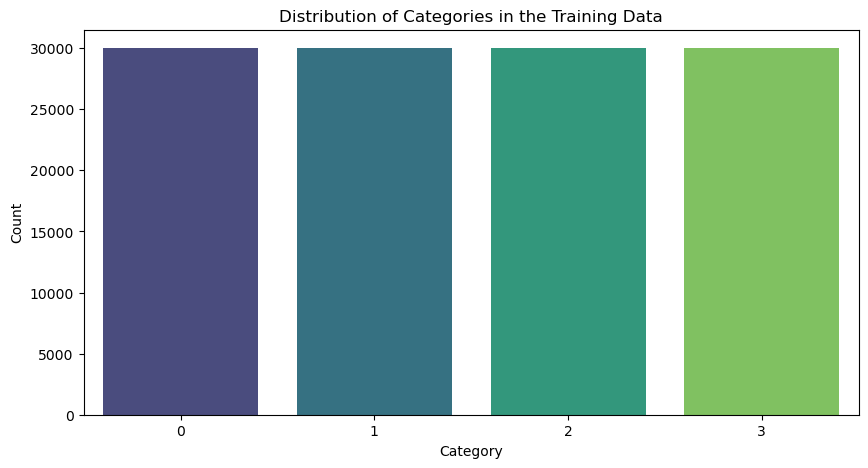

In [20]:
# Plotting the distribution of categories
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in the Training Data')

## 📝 Preprocess the Text

####  Tokenization
في هاي الخطوة هنحول النصوص لكلمات

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
news = train_df['text'].values
tokenize_phase = [wordpunct_tokenize(i.lower()) for i in news]
news[0], tokenize_phase[0]

("Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 ['wall',
  'st',
  '.',
  'bears',
  'claw',
  'back',
  'into',
  'the',
  'black',
  '(',
  'reuters',
  ')',
  'reuters',
  '-',
  'short',
  '-',
  'sellers',
  ',',
  'wall',
  'street',
  "'",
  's',
  'dwindling',
  '\\',
  'band',
  'of',
  'ultra',
  '-',
  'cynics',
  ',',
  'are',
  'seeing',
  'green',
  'again',
  '.'])

#### Stopwords and Punctuation Removal
في هاي الخطوة هنعمل كلين للداتا ونقيم علامات الترقيم والكلمات اللي ما الها تاثير ولا دلالة في المعنى وممكن تعمل تحيز في الموديل اللي هنبني

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
en_stopwords = stopwords.words('english')
cleaning_phase1 = []

for news_tokens in tokenize_phase:
    cleaning_phase1.append([i for i in news_tokens if i not in en_stopwords])

tokenize_phase[0], cleaning_phase1[0]

(['wall',
  'st',
  '.',
  'bears',
  'claw',
  'back',
  'into',
  'the',
  'black',
  '(',
  'reuters',
  ')',
  'reuters',
  '-',
  'short',
  '-',
  'sellers',
  ',',
  'wall',
  'street',
  "'",
  's',
  'dwindling',
  '\\',
  'band',
  'of',
  'ultra',
  '-',
  'cynics',
  ',',
  'are',
  'seeing',
  'green',
  'again',
  '.'],
 ['wall',
  'st',
  '.',
  'bears',
  'claw',
  'back',
  'black',
  '(',
  'reuters',
  ')',
  'reuters',
  '-',
  'short',
  '-',
  'sellers',
  ',',
  'wall',
  'street',
  "'",
  'dwindling',
  '\\',
  'band',
  'ultra',
  '-',
  'cynics',
  ',',
  'seeing',
  'green',
  '.'])

In [28]:
to_remove = string.punctuation + '0123456789'
cleaning_phase2 = []

for news_tokens in cleaning_phase1:
    cleaning_phase2.append([i for i in news_tokens if i not in to_remove])

cleaning_phase1[0], cleaning_phase2[0]

(['wall',
  'st',
  '.',
  'bears',
  'claw',
  'back',
  'black',
  '(',
  'reuters',
  ')',
  'reuters',
  '-',
  'short',
  '-',
  'sellers',
  ',',
  'wall',
  'street',
  "'",
  'dwindling',
  '\\',
  'band',
  'ultra',
  '-',
  'cynics',
  ',',
  'seeing',
  'green',
  '.'],
 ['wall',
  'st',
  'bears',
  'claw',
  'back',
  'black',
  'reuters',
  'reuters',
  'short',
  'sellers',
  'wall',
  'street',
  'dwindling',
  'band',
  'ultra',
  'cynics',
  'seeing',
  'green'])

#### Stemming (Use Snowball Stemmer)
في هاي الخطوة هنرجع كل كلمة لأصلها أو جذرها بحيث نجمع الكلمات المتشابهة وان كانت مش نتائج دقيقية لكن عملية التحويل واحدة للكلمات المتشابهة

In [30]:
stemmer = SnowballStemmer(language='english')
stemming_phase = []

for news_tokens in cleaning_phase2:
    stemming_phase.append([stemmer.stem(i) for i in news_tokens])

cleaning_phase2[0], stemming_phase[0]

(['wall',
  'st',
  'bears',
  'claw',
  'back',
  'black',
  'reuters',
  'reuters',
  'short',
  'sellers',
  'wall',
  'street',
  'dwindling',
  'band',
  'ultra',
  'cynics',
  'seeing',
  'green'],
 ['wall',
  'st',
  'bear',
  'claw',
  'back',
  'black',
  'reuter',
  'reuter',
  'short',
  'seller',
  'wall',
  'street',
  'dwindl',
  'band',
  'ultra',
  'cynic',
  'see',
  'green'])

In [31]:
train_df['stemmed_text'] = [' '.join(i) for i in stemming_phase]
train_df.head()

,text,label,stemmed_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,wall st bear claw back black reuter reuter sho...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,carlyl look toward commerci aerospac reuter re...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,iraq halt oil export main southern pipelin reu...
4,"Oil prices soar to all-time record, posing new...",2,oil price soar time record pose new menac us e...


## Vectorization using TF-IDF 🔠
في هاي الخطوة هنحول النصوص لفيكتورز وارقام قادر الموديل يتعامل معها

In [33]:
vectorizer = TfidfVectorizer()

# Fit the vectorizer and transform the stemmed text into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(train_df['stemmed_text'])
X_test_tfidf = vectorizer.transform([' '.join(stemmer.stem(word) for word in wordpunct_tokenize(i.lower()) if word not in en_stopwords and word not in to_remove) for i in test_df['text']])

In [34]:
X_train_tfidf

<120000x46043 sparse matrix of type '<class 'numpy.float64'>'
	with 2693940 stored elements in Compressed Sparse Row format>

In [35]:
X_test_tfidf

<7600x46043 sparse matrix of type '<class 'numpy.float64'>'
	with 168558 stored elements in Compressed Sparse Row format>

In [36]:
# labels
y_train = train_df['label']
y_test = test_df['label']

# shapes of the TF-IDF matrices and labels
print(X_train_tfidf.shape, X_test_tfidf.shape, y_train.shape, y_test.shape)

(120000, 46043) (7600, 46043) (120000,) (7600,)


## 🤖 Train and Test Classifiers

### 📈 Logistic Regression

In [38]:
# Initialize and train the classifier
logisticRegressionClassifiers = LogisticRegression()
logisticRegressionClassifiers.fit(X_train_tfidf, y_train)

LogisticRegression()

In [39]:
# Predict
y_predict_logisticRegressionClassifiers = logisticRegressionClassifiers.predict(X_test_tfidf)

In [40]:
# Evaluate
precision_lr = precision_score(y_test, y_predict_logisticRegressionClassifiers, average=None)
recall_lr = recall_score(y_test, y_predict_logisticRegressionClassifiers, average=None)
f1_lr = f1_score(y_test, y_predict_logisticRegressionClassifiers, average=None)
accuracy_lr = accuracy_score(y_test, y_predict_logisticRegressionClassifiers)

In [41]:
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_lr:.4f}")
for i, category in enumerate(['World', 'Sports', 'Business', 'Science/Technology']):
    print(f"{category}:")
    print(f"  Precision: {precision_lr[i]:.4f}")
    print(f"  Recall: {recall_lr[i]:.4f}")
    print(f"  F1-Score: {f1_lr[i]:.4f}")

Logistic Regression Classifier:
Accuracy: 0.9153
World:
  Precision: 0.9300
  Recall: 0.9016
  F1-Score: 0.9156
Sports:
  Precision: 0.9549
  Recall: 0.9811
  F1-Score: 0.9678
Business:
  Precision: 0.8889
  Recall: 0.8800
  F1-Score: 0.8844
Science/Technology:
  Precision: 0.8868
  Recall: 0.8984
  F1-Score: 0.8925


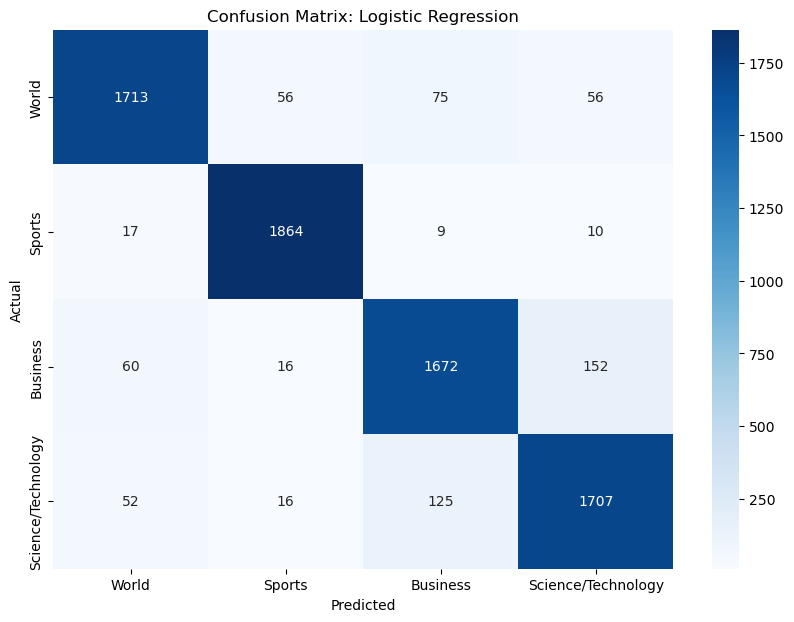

In [42]:
# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_predict_logisticRegressionClassifiers)

categories = ['World', 'Sports', 'Business', 'Science/Technology']
conf_matrix_lr_df = pd.DataFrame(conf_matrix_lr, index=categories, columns=categories)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

### 🌲 Decision Tree

In [44]:
# Initialize and train the classifier
decisionTreeClassifiers = DecisionTreeClassifier()
decisionTreeClassifiers.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [45]:
# Predict
y_predict_decisionTreeClassifiers = decisionTreeClassifiers.predict(X_test_tfidf)

In [46]:
# Evaluate
precision_dt = precision_score(y_test, y_predict_decisionTreeClassifiers, average=None)
recall_dt = recall_score(y_test, y_predict_decisionTreeClassifiers, average=None)
f1_dt = f1_score(y_test, y_predict_decisionTreeClassifiers, average=None)
accuracy_dt = accuracy_score(y_test, y_predict_decisionTreeClassifiers)

In [47]:
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.4f}")
for i, category in enumerate(['World', 'Sports', 'Business', 'Science/Technology']):
    print(f"{category}:")
    print(f"  Precision: {precision_dt[i]:.4f}")
    print(f"  Recall: {recall_dt[i]:.4f}")
    print(f"  F1-Score: {f1_dt[i]:.4f}")

Decision Tree Classifier:
Accuracy: 0.8145
World:
  Precision: 0.8212
  Recall: 0.8242
  F1-Score: 0.8227
Sports:
  Precision: 0.8608
  Recall: 0.8921
  F1-Score: 0.8762
Business:
  Precision: 0.7831
  Recall: 0.7695
  F1-Score: 0.7762
Science/Technology:
  Precision: 0.7900
  Recall: 0.7721
  F1-Score: 0.7809


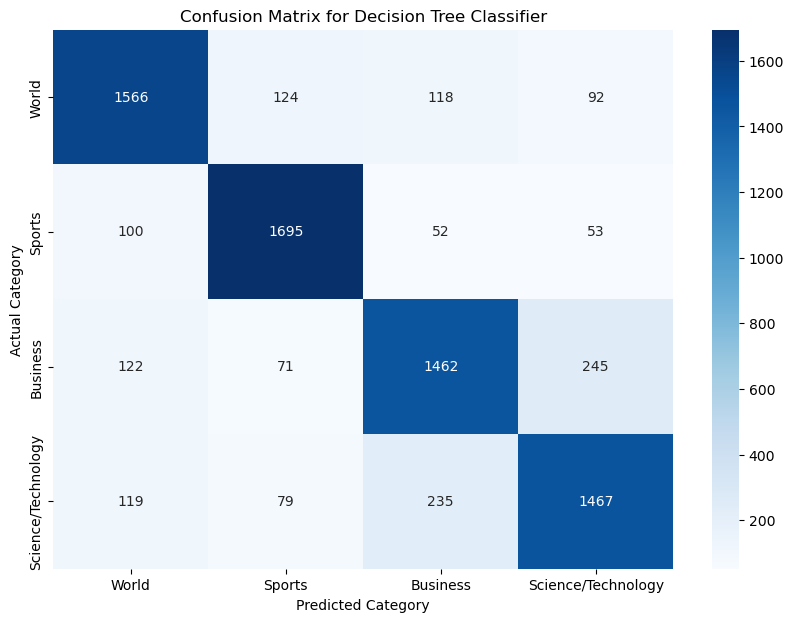

In [48]:
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_predict_decisionTreeClassifiers)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

###  ⚡  Boosting (Gradient Boosting)

In [50]:
# Initialize and train the classifier
gradientBoostingClassifiers = GradientBoostingClassifier()
gradientBoostingClassifiers.fit(X_train_tfidf, y_train)

GradientBoostingClassifier()

In [51]:
# Predict
y_predict_gradientBoostingClassifiers = gradientBoostingClassifiers.predict(X_test_tfidf)

In [52]:
# Evaluate
precision_gb = precision_score(y_test, y_predict_gradientBoostingClassifiers, average=None)
recall_gb = recall_score(y_test, y_predict_gradientBoostingClassifiers, average=None)
f1_gb = f1_score(y_test, y_predict_gradientBoostingClassifiers, average=None)
accuracy_gb = accuracy_score(y_test, y_predict_gradientBoostingClassifiers)

In [53]:
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
for i, category in enumerate(['World', 'Sports', 'Business', 'Science/Technology']):
    print(f"{category}:")
    print(f"  Precision: {precision_gb[i]:.4f}")
    print(f"  Recall: {recall_gb[i]:.4f}")
    print(f"  F1-Score: {f1_gb[i]:.4f}")

Gradient Boosting Classifier:
Accuracy: 0.8436
World:
  Precision: 0.8910
  Recall: 0.8258
  F1-Score: 0.8571
Sports:
  Precision: 0.9075
  Recall: 0.9084
  F1-Score: 0.9079
Business:
  Precision: 0.8219
  Recall: 0.8137
  F1-Score: 0.8178
Science/Technology:
  Precision: 0.7636
  Recall: 0.8263
  F1-Score: 0.7937


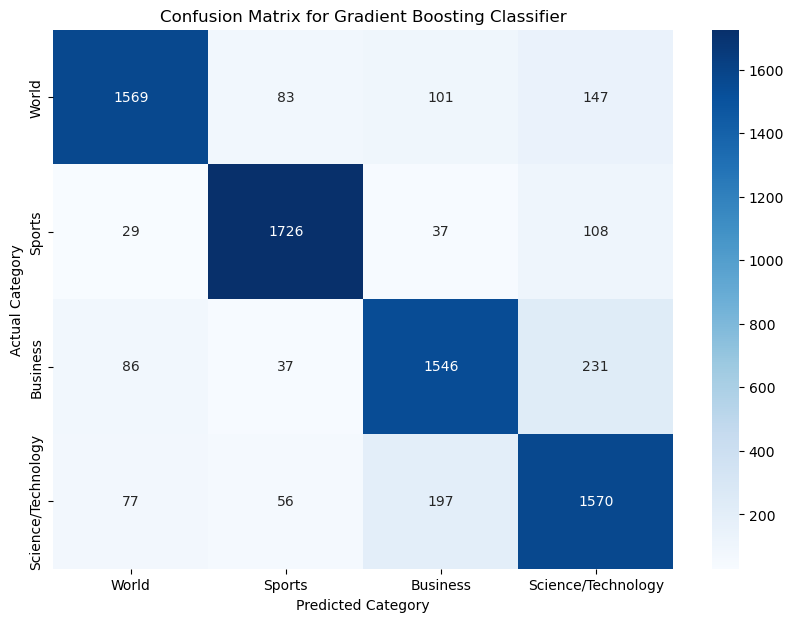

In [54]:
# Compute confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_predict_gradientBoostingClassifiers)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### 👬 K-Nearest Neighbors (KNN)

In [56]:
# Initialize and train the classifier
kNearestNeighborsClassifiers = KNeighborsClassifier()
kNearestNeighborsClassifiers.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [57]:
# Predict
y_predict_kNearestNeighborsClassifiers = kNearestNeighborsClassifiers.predict(X_test_tfidf)

In [58]:
# Evaluate
precision_knn = precision_score(y_test, y_predict_kNearestNeighborsClassifiers, average=None)
recall_knn = recall_score(y_test, y_predict_kNearestNeighborsClassifiers, average=None)
f1_knn = f1_score(y_test, y_predict_kNearestNeighborsClassifiers, average=None)
accuracy_knn = accuracy_score(y_test, y_predict_kNearestNeighborsClassifiers)

In [59]:
print("K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.4f}")
for i, category in enumerate(['World', 'Sports', 'Business', 'Science/Technology']):
    print(f"{category}:")
    print(f"  Precision: {precision_knn[i]:.4f}")
    print(f"  Recall: {recall_knn[i]:.4f}")
    print(f"  F1-Score: {f1_knn[i]:.4f}")
print("-" * 50)

K-Nearest Neighbors Classifier:
Accuracy: 0.9013
World:
  Precision: 0.9007
  Recall: 0.8974
  F1-Score: 0.8990
Sports:
  Precision: 0.9500
  Recall: 0.9695
  F1-Score: 0.9596
Business:
  Precision: 0.8651
  Recall: 0.8711
  F1-Score: 0.8681
Science/Technology:
  Precision: 0.8884
  Recall: 0.8674
  F1-Score: 0.8778
--------------------------------------------------


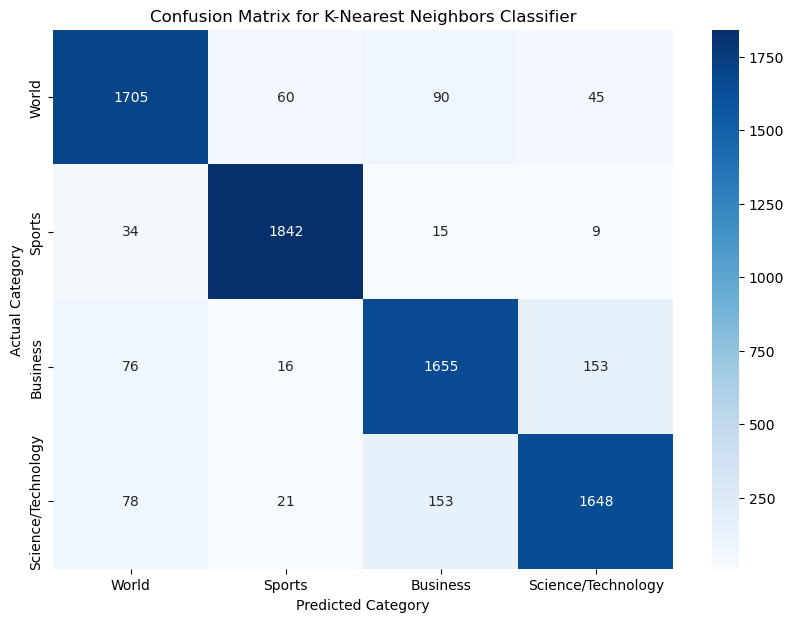

In [60]:
# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_predict_kNearestNeighborsClassifiers)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

## 📊 Compare Accuracy with Plotting

In [62]:
metrics = {
    "Category": ["World", "Sports", "Business", "Science/Technology"],
    "Logistic Regression": {
        "Precision": precision_lr,
        "Recall": recall_lr,
        "F1-Score": f1_lr,
        "Accuracy": accuracy_lr
    },
    "Decision Tree": {
        "Precision": precision_dt,
        "Recall": recall_dt,
        "F1-Score": f1_dt,
        "Accuracy": accuracy_dt
    },
    "Gradient Boosting": {
        "Precision": precision_gb,
        "Recall": recall_gb,
        "F1-Score": f1_gb,
        "Accuracy": accuracy_gb
    },
    "K-Nearest Neighbors": {
        "Precision": precision_knn,
        "Recall": recall_knn,
        "F1-Score": f1_knn,
        "Accuracy": accuracy_knn
    }
}

In [63]:
accuracy_df = pd.DataFrame({
    "Classifier": ["Logistic Regression", "Decision Tree", "Gradient Boosting", "K-Nearest Neighbors"],
    "Accuracy": [
        metrics["Logistic Regression"]["Accuracy"],
        metrics["Decision Tree"]["Accuracy"],
        metrics["Gradient Boosting"]["Accuracy"],
        metrics["K-Nearest Neighbors"]["Accuracy"]
    ]
})

print("Accuracy Comparison")
accuracy_df

Accuracy Comparison


,Classifier,Accuracy
0,Logistic Regression,0.915263
1,Decision Tree,0.814474
2,Gradient Boosting,0.843553
3,K-Nearest Neighbors,0.901316


In [64]:
precision_df = pd.DataFrame({
    "Category": metrics["Category"],
    "Logistic Regression": metrics["Logistic Regression"]["Precision"],
    "Decision Tree": metrics["Decision Tree"]["Precision"],
    "Gradient Boosting": metrics["Gradient Boosting"]["Precision"],
    "K-Nearest Neighbors": metrics["K-Nearest Neighbors"]["Precision"]
})

print("Precision Comparison")
precision_df

Precision Comparison


,Category,Logistic Regression,Decision Tree,Gradient Boosting,K-Nearest Neighbors
0,World,0.929967,0.821185,0.890971,0.900687
1,Sports,0.954918,0.860843,0.907466,0.949974
2,Business,0.888889,0.783074,0.821903,0.865133
3,Science/Technology,0.886753,0.789984,0.763619,0.888410


In [65]:
recall_df = pd.DataFrame({
    "Category": metrics["Category"],
    "Logistic Regression": metrics["Logistic Regression"]["Recall"],
    "Decision Tree": metrics["Decision Tree"]["Recall"],
    "Gradient Boosting": metrics["Gradient Boosting"]["Recall"],
    "K-Nearest Neighbors": metrics["K-Nearest Neighbors"]["Recall"]
})

print("Recall Comparison")
recall_df

Recall Comparison


,Category,Logistic Regression,Decision Tree,Gradient Boosting,K-Nearest Neighbors
0,World,0.901579,0.824211,0.825789,0.897368
1,Sports,0.981053,0.892105,0.908421,0.969474
2,Business,0.880000,0.769474,0.813684,0.871053
3,Science/Technology,0.898421,0.772105,0.826316,0.867368


In [66]:
f1_df = pd.DataFrame({
    "Category": metrics["Category"],
    "Logistic Regression": metrics["Logistic Regression"]["F1-Score"],
    "Decision Tree": metrics["Decision Tree"]["F1-Score"],
    "Gradient Boosting": metrics["Gradient Boosting"]["F1-Score"],
    "K-Nearest Neighbors": metrics["K-Nearest Neighbors"]["F1-Score"]
})

print("F1-Score Comparison")
f1_df

F1-Score Comparison


,Category,Logistic Regression,Decision Tree,Gradient Boosting,K-Nearest Neighbors
0,World,0.915553,0.822695,0.857143,0.899025
1,Sports,0.967809,0.876195,0.907943,0.959625
2,Business,0.884422,0.776214,0.817773,0.868083
3,Science/Technology,0.892549,0.780942,0.793731,0.877763


## Plot For Visulaization 📊🚀

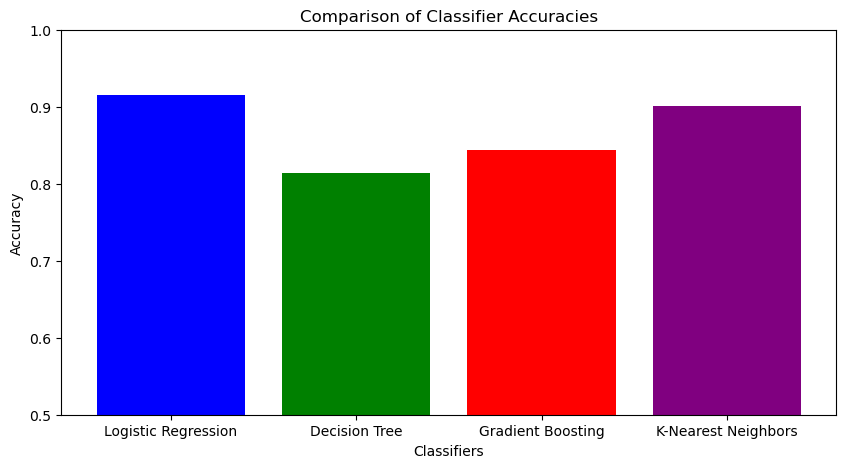

In [68]:
plt.figure(figsize=(10, 5))
plt.bar(accuracy_df['Classifier'], accuracy_df['Accuracy'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0.5, 1)
plt.show()

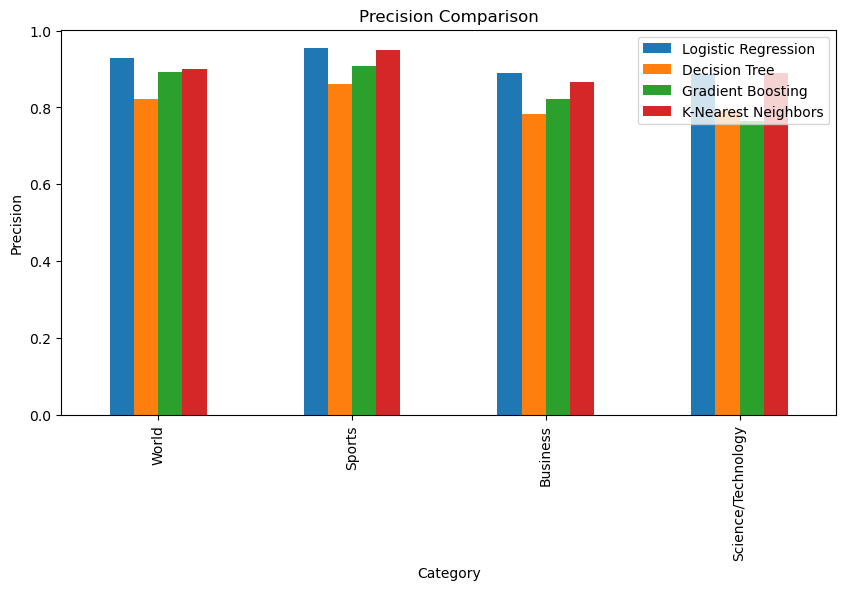

In [69]:
# Plot Precision Comparison
precision_df.plot(x='Category', kind='bar', figsize=(10, 5), title='Precision Comparison')
plt.xlabel('Category')
plt.ylabel('Precision')
plt.show()

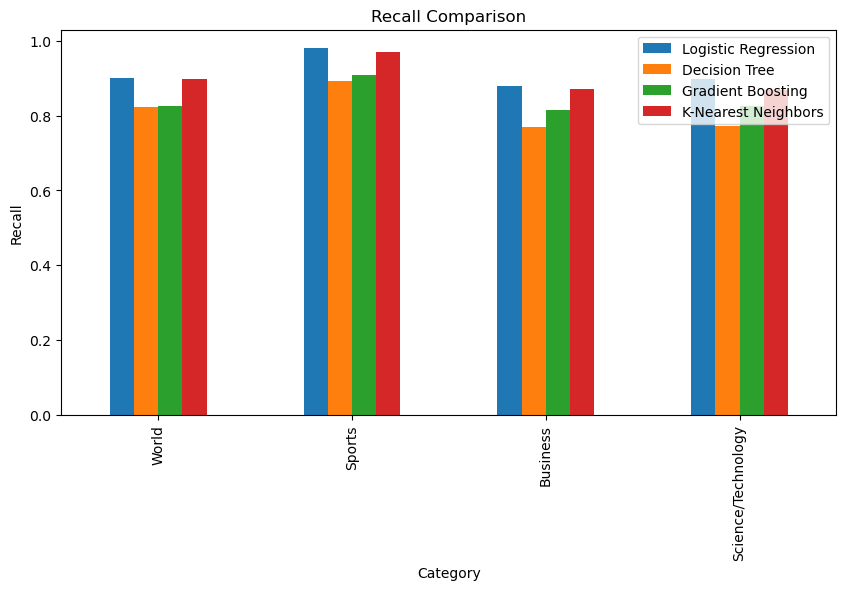

In [70]:
# Plot Recall Comparison
recall_df.plot(x='Category', kind='bar', figsize=(10, 5), title='Recall Comparison')
plt.xlabel('Category')
plt.ylabel('Recall')
plt.show()

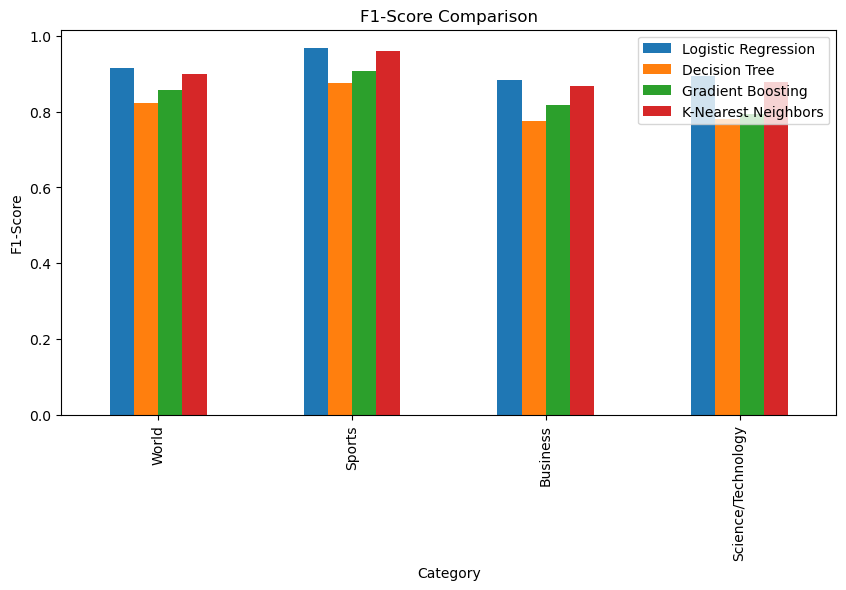

In [71]:
# Plot F1-Score Comparison
f1_df.plot(x='Category', kind='bar', figsize=(10, 5), title='F1-Score Comparison')
plt.xlabel('Category')
plt.ylabel('F1-Score')
plt.show()

## 🔍 Test the Classifiers on a New Instance

In [86]:
# New instance
new_instance = "Apple announces new iPhone model with groundbreaking features, new mobile" # Science/Technology

# Convert the processed instance to TF-IDF features
X_new_instance = vectorizer.transform([new_instance])

# Predict using each classifier
y_pred_lr = logisticRegressionClassifiers.predict(X_new_instance)
y_pred_dt = decisionTreeClassifiers.predict(X_new_instance)
y_pred_gb = gradientBoostingClassifiers.predict(X_new_instance)
y_pred_knn = kNearestNeighborsClassifiers.predict(X_new_instance)

category_mapping = {i: category for i, category in enumerate(categories)}

# Print the predictions
print(f"Logistic Regression Classifier Prediction: {category_mapping[y_pred_lr[0]]}")
print(f"Decision Tree Classifier Prediction: {category_mapping[y_pred_dt[0]]}")
print(f"Gradient Boosting Classifier Prediction: {category_mapping[y_pred_gb[0]]}")
print(f"K-Nearest Neighbors Classifier Prediction: {category_mapping[y_pred_knn[0]]}")

Logistic Regression Classifier Prediction: Science/Technology
Decision Tree Classifier Prediction: Science/Technology
Gradient Boosting Classifier Prediction: Science/Technology
K-Nearest Neighbors Classifier Prediction: Science/Technology


In [88]:
# New instance
new_instance = "Olympic gold medalist loses title due to a doping scandal, fans heartbroken"

# Convert the processed instance to TF-IDF features
X_new_instance = vectorizer.transform([new_instance])

# Predict using each classifier
y_pred_lr = logisticRegressionClassifiers.predict(X_new_instance)
y_pred_dt = decisionTreeClassifiers.predict(X_new_instance)
y_pred_gb = gradientBoostingClassifiers.predict(X_new_instance)
y_pred_knn = kNearestNeighborsClassifiers.predict(X_new_instance)

# Map the predicted labels to category names
category_mapping = {i: category for i, category in enumerate(categories)}

# Print the predictions
print(f"Logistic Regression Classifier Prediction: {category_mapping[y_pred_lr[0]]}")
print(f"Decision Tree Classifier Prediction: {category_mapping[y_pred_dt[0]]}")
print(f"Gradient Boosting Classifier Prediction: {category_mapping[y_pred_gb[0]]}")
print(f"K-Nearest Neighbors Classifier Prediction: {category_mapping[y_pred_knn[0]]}")

Logistic Regression Classifier Prediction: Sports
Decision Tree Classifier Prediction: Sports
Gradient Boosting Classifier Prediction: Science/Technology
K-Nearest Neighbors Classifier Prediction: Sports


In [90]:
# New instance
new_instance = "Stock markets plunge as fears of a recession grip the nation, investors panic"

# Convert the processed instance to TF-IDF features
X_new_instance = vectorizer.transform([new_instance])

# Predict using each classifier
y_pred_lr = logisticRegressionClassifiers.predict(X_new_instance)
y_pred_dt = decisionTreeClassifiers.predict(X_new_instance)
y_pred_gb = gradientBoostingClassifiers.predict(X_new_instance)
y_pred_knn = kNearestNeighborsClassifiers.predict(X_new_instance)

# Map the predicted labels to category names
category_mapping = {i: category for i, category in enumerate(categories)}

# Print the predictions
print(f"Logistic Regression Classifier Prediction: {category_mapping[y_pred_lr[0]]}")
print(f"Decision Tree Classifier Prediction: {category_mapping[y_pred_dt[0]]}")
print(f"Gradient Boosting Classifier Prediction: {category_mapping[y_pred_gb[0]]}")
print(f"K-Nearest Neighbors Classifier Prediction: {category_mapping[y_pred_knn[0]]}")

Logistic Regression Classifier Prediction: Business
Decision Tree Classifier Prediction: Business
Gradient Boosting Classifier Prediction: Business
K-Nearest Neighbors Classifier Prediction: World
